# Introduction

In this notebook we were given a marketing dataset which include a bunch of feature. We were task to optimize a marketing campaign in order to gain a maximum profit. The company is in need of a new strategy to increase their profit and one of it ways is to launch a new product. Based on the data we were task to maximize this marketing campaign for a new product to maximize the company profit. 

To tackle this problem we will use $\textit{predictive analysis}$ based on the customer behaviour. 

In this notebook there will be 4 section:
1. Data Preprocessing
2. Data Cleaning
3. Exploratory Data Analysis
4. Modelling

# Data Preprocessing

In [1]:
# Packages
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('marketing_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning
Based on Preprocessing section, there are a couple data types and column name that we need to clean. Those data types are 'Income' and 'Dt_Customer' that needs to be changed.

There are also missing values in 'Income' column, which we will try to fill it.

In [8]:
# See that there is a whitespace (' ') on the 'Income' column. We will try to fix it first
df.columns = df.columns.str.replace(' ', '')

In [9]:
# Notice that 'Income' columns has '$' and ',' which makes dtypes to be object.
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','')

In [10]:
# Now we change dtypes of 'Income' to be float
df['Income'] = df['Income'].astype('float')

In [11]:
# Next we will change 'Dt_Customer' dtype to be datetime.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<Axes: ylabel='Frequency'>

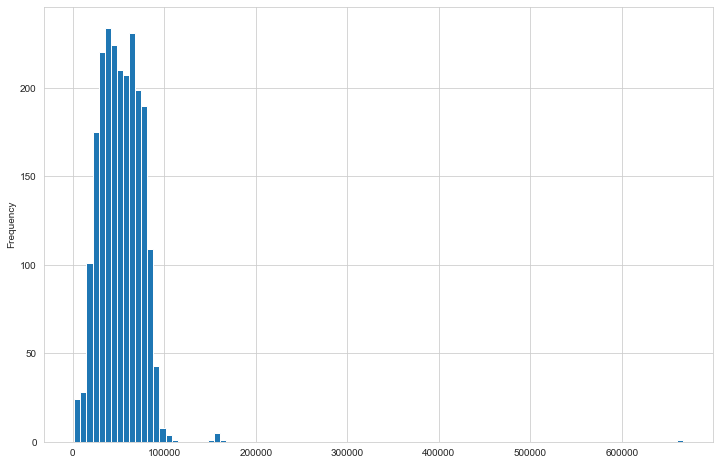

In [13]:
# Missing Null Values
df['Income'].plot(kind = 'hist',bins = 100, figsize=(12,8))

In [14]:
# Based on the plot above, there seems to be an outlier (checking using boxplot is recommended) and also the distribution seems to be skewed to the right
# So imputation using median is preferable
df['Income'].fillna(df['Income'].median(), inplace = True)

In [15]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

# Exploratory Data Analysis (EDA)

We will try analyze the data (visually) to see any pattern, trends, insight, and outliers (also dealing with them).

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [17]:
# Selecting columns with data types off integer and float. We only choose column that we want to visualize.
df_plot = df.select_dtypes(include = ['int64','float64'])
df_plot.drop(['ID','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain',
             'AcceptedCmp1','AcceptedCmp2'], 
             axis = 1, inplace = True)

In [18]:
df_plot

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4
2236,1977,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8
2237,1976,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8
2238,1978,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3


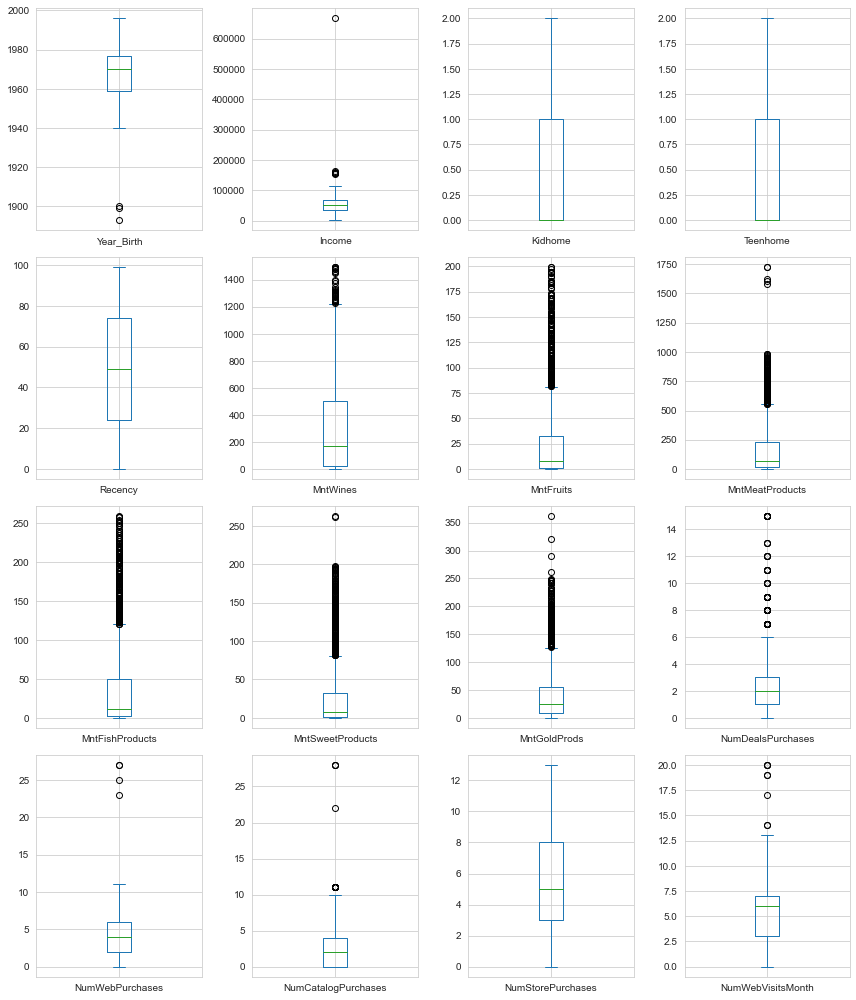

In [19]:
# Based on the boxplot below, there seems to be a person who was born < 1900, which doesn't seems quite right.
# We will try to clear that.
df_plot.plot(kind = 'box', subplots=True, layout = (4,4), figsize = (12,14))
plt.tight_layout()

In [20]:
df['Customer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

<Axes: >

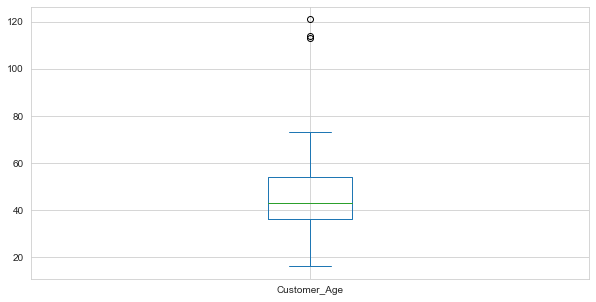

In [21]:
df['Customer_Age'].plot(kind='box',figsize=(10,5))

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [23]:
df['TotalAmntSpnt'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,TotalAmntSpnt
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,91


In [105]:
df['Cust_JoinDt'] = df['Dt_Customer'].dt.year

In [107]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,TotalAmntSpnt,Cust_JoinDt
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,1190,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,577,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,251,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,11,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,91,2014


<Axes: xlabel='Education', ylabel='count'>

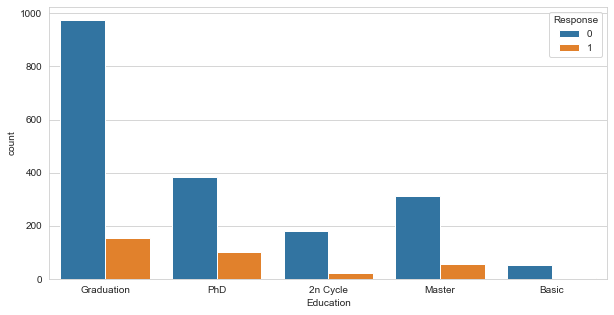

In [25]:
# People with 'Basic' education will most likely not response
plt.figure(figsize=(10,5))
sns.countplot(data = df, x= 'Education', hue = 'Response')

<Axes: xlabel='Marital_Status', ylabel='count'>

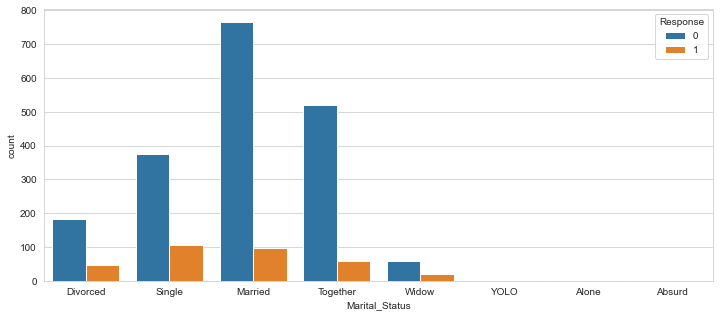

In [26]:
# What does marital_status of 'YOLO','Alone', and 'Absurd' mean?
# Can we assume that 'YOLO' and 'Alone' is the same ?
# Whats the difference between 'Alone' and 'Single' ?
plt.figure(figsize=(12,5))
sns.countplot(data = df, x= 'Marital_Status', hue = 'Response')

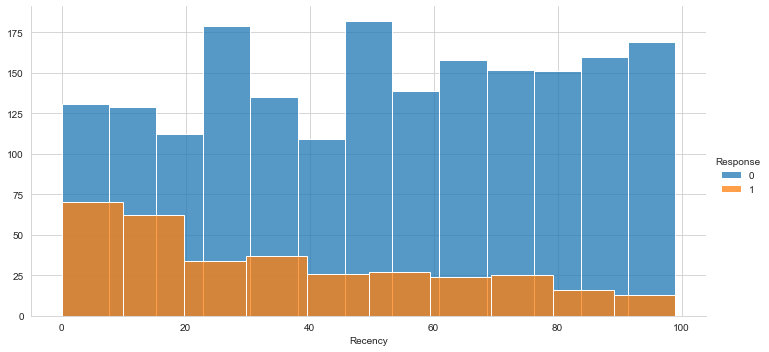

In [27]:
g = sns.FacetGrid(df, hue='Response', size = 5, aspect = 2)
g.map_dataframe(sns.histplot,'Recency').add_legend()

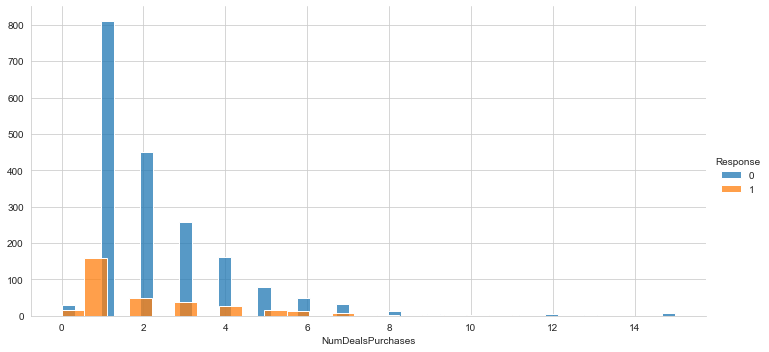

In [28]:
g = sns.FacetGrid(df, hue='Response', size = 5, aspect = 2)
g.map_dataframe(sns.histplot,'NumDealsPurchases').add_legend()

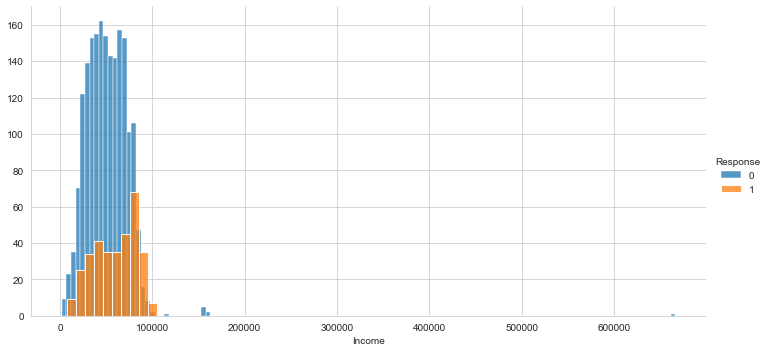

In [29]:
g = sns.FacetGrid(df, hue='Response', size = 5, aspect = 2)
g.map_dataframe(sns.histplot,'Income').add_legend()

<Axes: xlabel='Response', ylabel='Income'>

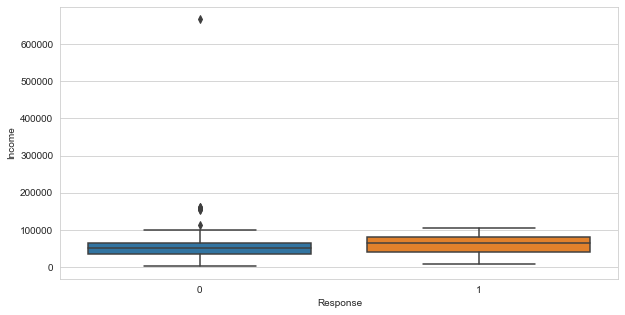

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x='Response', y ='Income')

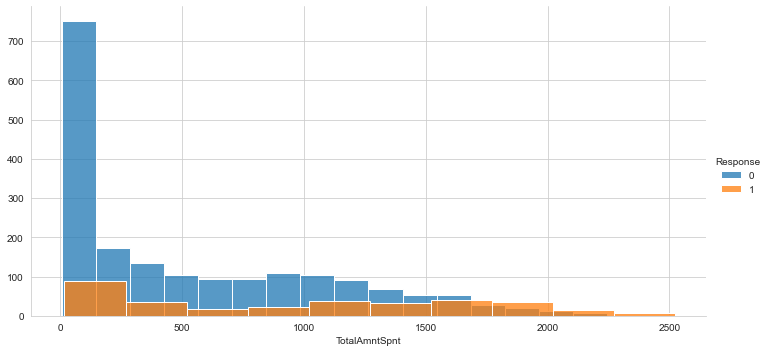

In [133]:
g = sns.FacetGrid(df, hue='Response', size = 5, aspect = 2)
g.map_dataframe(sns.histplot,'TotalAmntSpnt').add_legend()

<Axes: xlabel='Country', ylabel='count'>

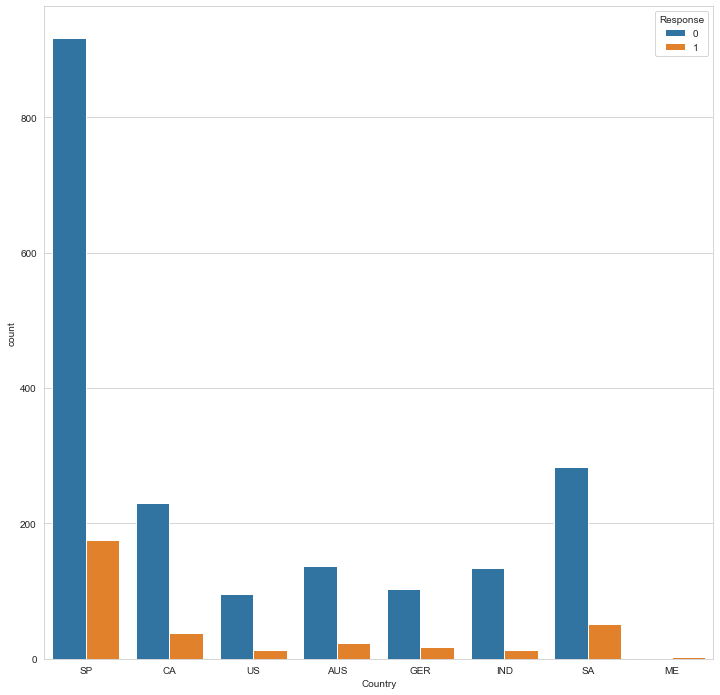

In [135]:
plt.figure(figsize=(12,12))
sns.countplot(data = df, x = 'Country', hue = 'Response')

<Axes: xlabel='Cust_JoinDt', ylabel='count'>

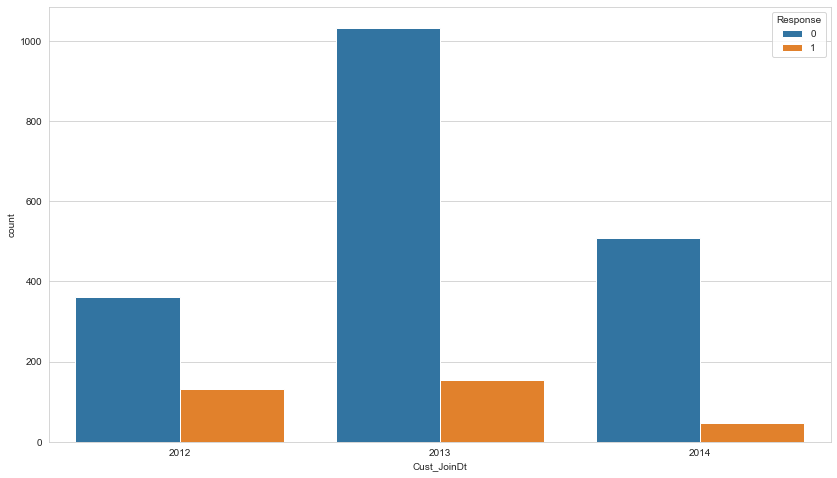

In [142]:
plt.figure(figsize=(14,8))
sns.countplot(data = df, x = 'Cust_JoinDt', hue = 'Response')

<Axes: >

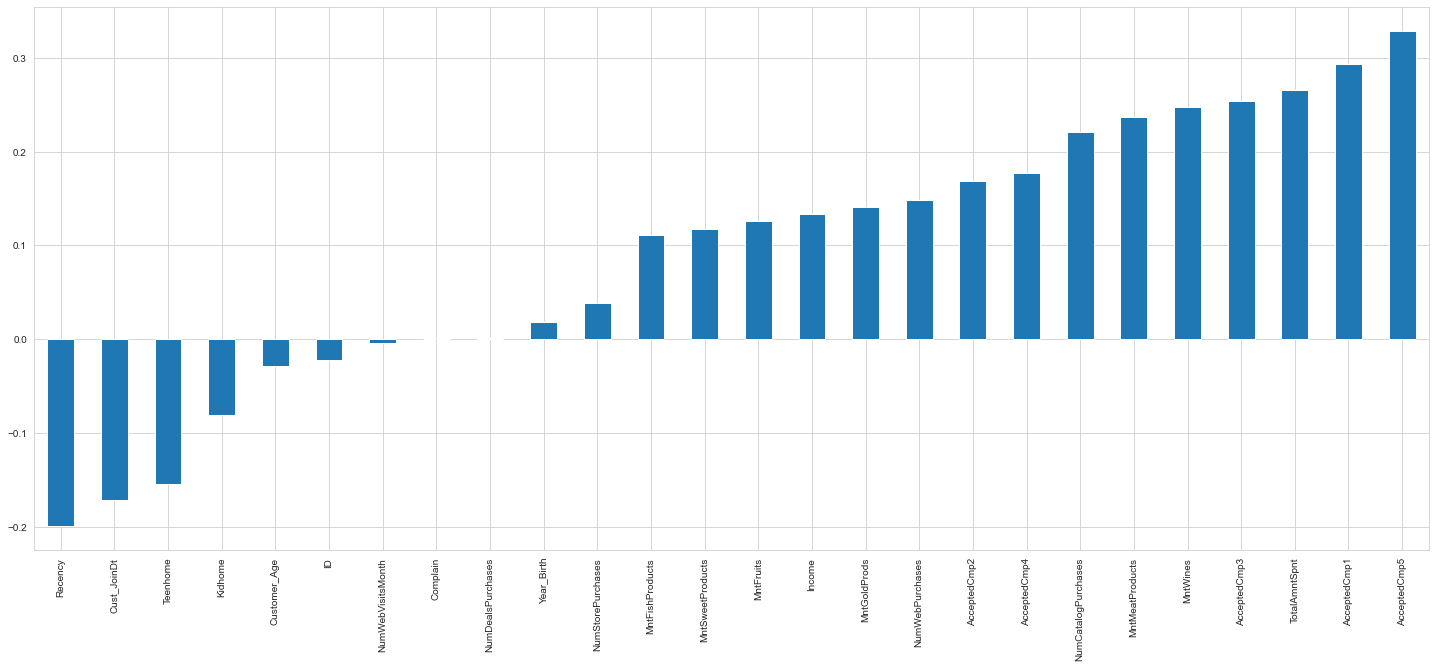

In [140]:
# Looking the correlation between 'Response' column and other features.

corr = df.select_dtypes(include =['int64','float64','int32']).corr()
corr['Response'].drop('Response').sort_values(ascending=True).plot(kind='bar',figsize=(25,10))

## Dealing with Outliers

In [33]:
# We will try to deal with outliers in 'Year_Birth' column using IQR method
# Since based on the boxplot above the outliers seems to < Q1 then we only need to deal with that

IQR = np.quantile(df['Year_Birth'],0.75) - np.quantile(df['Year_Birth'],0.25)

outliers_idx = df[df['Year_Birth'] < np.quantile(df['Year_Birth'],0.25) - 1.5*IQR].index
df = df.drop(index = outliers_idx)

## Dealing with Marital Status 
Based on the barplot above, there seems to be 'YOLO', 'Alone', and 'Absurd' marital status. In this case I will assume that 'Alone' and 'Single' are the same Marital Status, that is living by yourself. 'YOLO' and 'Absurd' will be categorized as 'Others'

In [34]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x == 'Alone' else x)

In [35]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Other' if x in ['YOLO','Absurd'] else x)

# Modelling

In [119]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,TotalAmntSpnt,Cust_JoinDt
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,1190,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,577,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,251,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,11,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,91,2014


In [120]:
# First we will change the categorical feature by using pd.get_dummies
ed_dummies = pd.get_dummies(df['Education'], drop_first = True,dtype = float)
ms_dummies = pd.get_dummies(df['Marital_Status'], drop_first = True,dtype = float)
co_dummies = pd.get_dummies(df['Country'], drop_first = True,dtype = float)

In [121]:
df_drop_cat = df.drop(['Education','Marital_Status','Country'], axis = 1)

In [122]:
df_model = pd.concat([df_drop_cat,ed_dummies,ms_dummies,co_dummies], axis = 1)

In [123]:
df_model.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Customer_Age,TotalAmntSpnt,Cust_JoinDt,Basic,Graduation,Master,PhD,Married,Other,Single,Together,Widow,CA,GER,IND,ME,SA,SP,US
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,44,1190,2014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,53,577,2014,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,56,251,2014,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,47,11,2014,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,25,91,2014,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [124]:
df_model_final = df_model.drop(['ID','Year_Birth','Dt_Customer'],axis = 1)

In [125]:
# Importing modelling packages

from sklearn.model_selection import train_test_split # Train Test Split (Splitting train and test data)
from sklearn.ensemble import RandomForestClassifier #Random Forest

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score # Score

In [126]:
X = df_model_final.drop(['Response', 'Complain', 'NumDealsPurchases','NumWebVisitsMonth',
                        'Customer_Age','Kidhome','NumStorePurchases','Income','MntFruits',
                        'MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases',
                        'AcceptedCmp2','AcceptedCmp4'],axis = 1)
y = df_model_final['Response']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [128]:
rfc = RandomForestClassifier()

In [129]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
rfc_pred = rfc.predict(X_test)

In [131]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       577
           1       0.79      0.36      0.49        95

    accuracy                           0.90       672
   macro avg       0.85      0.67      0.72       672
weighted avg       0.89      0.90      0.88       672



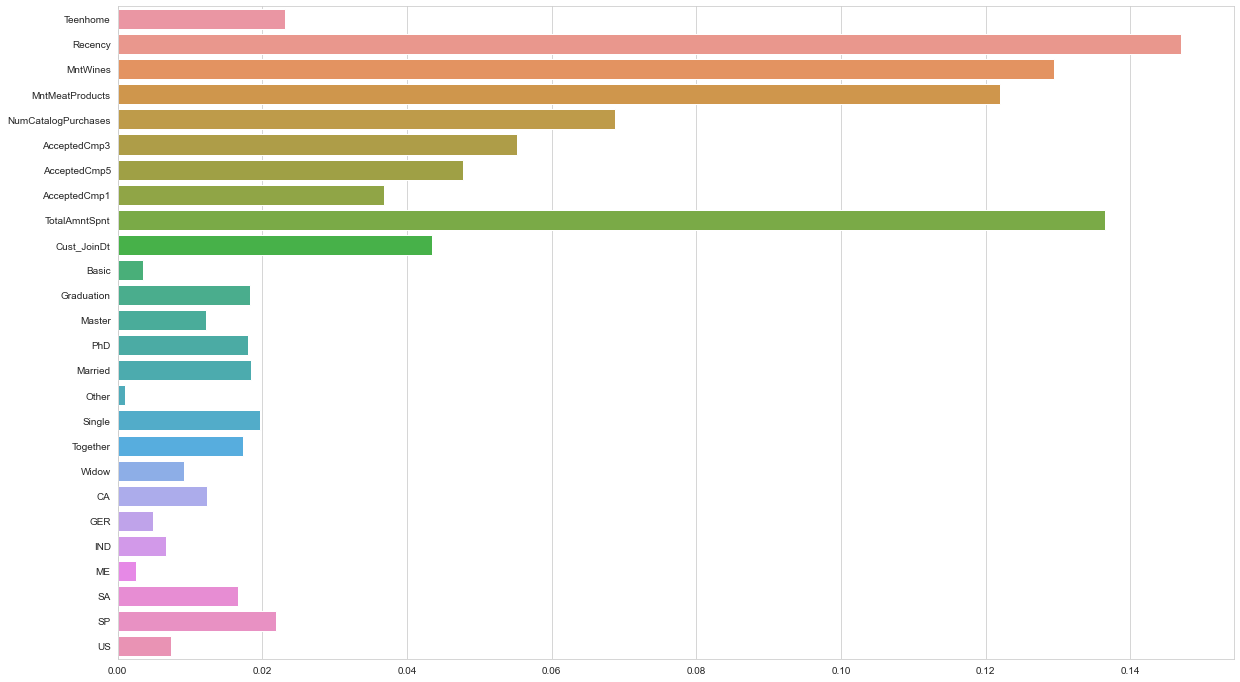

In [137]:
plt.figure(figsize=(20,12))
sns.barplot(y = X.columns, x= rfc.feature_importances_)
plt.show()